## Data analysis ##

In [30]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import textstat
import emoji
import re

In [31]:
# Define the base path to your CSV files
#base_path = '/Users/sandervanduin/Desktop/HVA weekly /Digitial Marketing Strategy/DMSteam9'
base_path = '/Users/owenalberts/Desktop/Master Digital Driven Business/Digital marketing strategy/DMSteam9'
#base_path = 'C:\\Users\\patri\\Downloads\\'
# Explicitly load each CSV file into its own DataFrame
df1 = pd.read_csv(os.path.join(base_path, 'Themeparcs I.csv'), on_bad_lines='skip', delimiter=';')
df2 = pd.read_csv(os.path.join(base_path, 'Themeparcs II.csv'), on_bad_lines='skip', delimiter=';')
df3 = pd.read_csv(os.path.join(base_path, 'Themeparcs III.csv'), on_bad_lines='skip', delimiter=';')
df4 = pd.read_csv(os.path.join(base_path, 'Themeparcs IV.csv'), on_bad_lines='skip', delimiter=';')

# Example operation: print the first few rows of the DataFrame
merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
print("First few rows of Merged Themeparcs :")
merged_df.head(5)

First few rows of Merged Themeparcs :


,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,Engagement,Number of Likes,Link-posts,Picture Posts,Video-posts,Profile-ID,Post-ID,Link
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,NaN,2.0,2.0,2.0,2.0,"1,09E+12","1090000000000,00",13.0,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,NaN,1.0,2.0,1.0,1.0,"4,17E+11","417000000000,00",33.0,NaN,NaN,NaN,"1,84E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,NaN,2.0,3.0,2.0,2.0,"2,85E+11","285000000000,00",21.0,NaN,NaN,1.0,"1,84E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,NaN,52.0,12.0,56.0,56.0,"1,36E+11","136000000000,00",478.0,NaN,1.0,NaN,"6,52E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,NaN,2.0,0.0,2.0,2.0,"4,96E+11","496000000000,00",16.0,NaN,NaN,1.0,"7,63E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...


In [32]:
# Display the DataFrame's information, including index dtype and columns, non-null values, and memory usage
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15443 entries, 0 to 15442
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          15443 non-null  object 
 1   Profile                       15443 non-null  object 
 2   Message                       15443 non-null  object 
 3   Number of Reactions           15443 non-null  float64
 4   Number of Shares              0 non-null      float64
 5   Number of Comments (primary)  15443 non-null  float64
 6   Number of Shares.1            15443 non-null  float64
 7   Comments per post             15443 non-null  float64
 8   Comments on posts by fans     15443 non-null  float64
 9   Post interaction rate         15443 non-null  object 
 10  Engagement                    15443 non-null  object 
 11  Number of Likes               15443 non-null  float64
 12  Link-posts                    555 non-null    float64
 13  P

In [33]:
# Assuming your DataFrame is named df
unique_profiles = merged_df.drop_duplicates(subset=['Profile-ID'])

# Print the unique profiles
unique_profiles[['Profile', 'Profile-ID']].head(5)

,Profile,Profile-ID
0,Wild Adventures Theme Park,84679583132
1,Fun Spot America,"1,84E+11"
3,Disneyland Paris,"6,52E+14"
4,Silverwood Theme Park,"7,63E+14"
5,Belmont Park,83231004302


In [34]:
# Counts of unique values for a specific column
merged_df['Profile'].value_counts().head(5)

Profile
Wild Adventures Theme Park    955
Happy Hollow Park & Zoo       627
Cedar Point                   478
Walt Disney Studios (US)      450
Playland                      446
Name: count, dtype: int64

In [35]:
# Assuming merged_df is your DataFrame

# Sum up the number of reactions for each profile
reactions_sum = merged_df.groupby(['Profile', 'Profile-ID'])['Number of Reactions'].sum().reset_index()

# Sort profiles by the number of reactions in descending order and get the top 100
top_profiles = reactions_sum.sort_values('Number of Reactions', ascending=False).head(100)

top_profiles.head(10)


,Profile,Profile-ID,Number of Reactions
54,Walt Disney Animation Studios,23245476854,1745666.0
55,Walt Disney Studios (US),"1,11E+14",1343887.0
13,Disneyland,11081890741,540414.0
52,Universal Orlando Resort (US),90867402851,434662.0
56,Walt Disney World,"1,56E+11",426506.0
4,Busch Gardens Tampa Bay,68181225238,289953.0
11,Cedar Point,10625691462,256408.0
53,Universal Studios Hollywood,61784580148,236426.0
34,Santa Cruz Beach Boardwalk,40035168377,222131.0
22,Hersheypark,16994689356,209908.0


In [36]:
# Count the number of unique 'Disneyland' profiles based on unique 'Profile-ID's
disneyland_unique_count = merged_df[merged_df['Profile'] == 'Nagashima Spa Land'].drop_duplicates(subset=['Profile-ID']).shape[0]

disneyland_unique_count


0

In [37]:
# Filter the DataFrame for rows where 'Profile' contains 'Disneyland' (case-insensitive)
# and drop duplicates based on 'Profile-ID' to ensure uniqueness
disneyland_like_unique_profiles = merged_df[merged_df['Profile'].str.contains('Disneyland', case=False, na=False)].drop_duplicates(subset=['Profile-ID'])

# Count the number of unique profiles that contain 'Disneyland'
disneyland_like_unique_count = disneyland_like_unique_profiles.shape[0]

disneyland_like_unique_count


2

In [38]:
# Counts of unique values for a specific column
merged_df['Number of Reactions'].value_counts()

Number of Reactions
6.0       207
4.0       206
3.0       201
5.0       200
1.0       193
         ... 
1094.0      1
1912.0      1
2545.0      1
2566.0      1
707.0       1
Name: count, Length: 1866, dtype: int64

In [39]:
# Mean or average of a column
print(merged_df['Number of Reactions'].mean())

# Median of a column
print(merged_df['Number of Reactions'].median())

494.2829113514214
67.0


In [40]:
# Fill NaN values with 0 for calculation
merged_df['Number of Shares'] = merged_df['Number of Shares'].fillna(0)
# merged_df['Number of Shares.1'] = merged_df['Number of Shares.1'].fillna(0)

# Calculate total shares by summing both shares columns
merged_df['total_shares'] = merged_df['Number of Shares'] + merged_df['Number of Shares.1']

# Now group by 'Profile' and sum the 'Total Shares', and then sort the sums in ascending order
shares_per_profile = merged_df.groupby('Profile')['total_shares'].sum().sort_values(ascending=False)

shares_per_profile.head(5)

Profile
Walt Disney Animation Studios    227392.0
Walt Disney Studios (US)         118026.0
Universal Orlando Resort (US)     76962.0
Walt Disney World                 59715.0
Disneyland                        51015.0
Name: total_shares, dtype: float64

## Creating our dependent variable

Unweighted engagement score ---> consisting of:
- `"Number of reactions"`
- `"total_shares"`
- `"Number of Comments (primary)"`
- `"Number of Likes"`

In [41]:
# Function to calculate the average excluding zeros, unless all values are zero
def calculate_unweighted_average(row):
    values = [row['Number of Reactions'], row['total_shares'], row['Number of Comments (primary)'], row['Number of Likes']]
    # Remove zeros but only if not all values are zeros
    filtered_values = [value for value in values if value != 0] or values
    return np.mean(filtered_values)
 
# Apply the function to each row in the DataFrame
merged_df['Unweighted_Engagement_Score'] = merged_df.apply(calculate_unweighted_average, axis=1)
 
# Display the first few rows to verify the changes
merged_df[['Date', 'Profile', 'Message', 'Number of Reactions', 'total_shares', 'Number of Comments (primary)', 'Number of Likes', 'Unweighted_Engagement_Score']].head()

,Date,Profile,Message,Number of Reactions,total_shares,Number of Comments (primary),Number of Likes,Unweighted_Engagement_Score
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,2.0,2.0,13.0,8.250000
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,2.0,1.0,33.0,18.500000
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,3.0,2.0,21.0,12.250000
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,12.0,52.0,478.0,297.000000
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,0.0,2.0,16.0,11.666667


## Feature Engineering per Sub-Question

#### Sub_Question 1:
- "What content features (e.g., visual elements, text, use of hashtags) are associated with higher engagement rates in theme park brand posts on Facebook?"

#### Sub_Question 2:

#### Sub_Question 3:

#### Sub_Question 4:

######################

### Sub Question 1

##### "What content features (e.g., visual elements, text, use of hashtags) are associated with higher engagement rates in theme park brand posts on Facebook?"

`Making new features`
- `Number of hashtags`
- `Text readability`
- `Readability score`
- `Emoji count`



In [42]:
# Making new features out of "Message" column
# -->  Count the number of hashtags in each message ----- Number of hashtags
# -->  Count the number of characters in each message ----- Text readability
# -->  Using Flesch Reading Ease formula ----- Readability score
# -->  Count the number of emojis in each message ----- Emoji count


# Count the number of characters in each message
merged_df['text_length'] = merged_df['Message'].apply(len)

# Count the number of hashtags in each message
merged_df['hashtag_count'] = merged_df['Message'].apply(lambda x: len([word for word in x.split() if word.startswith('#')]))

# What does the readability score mean?
# The Flesch Reading Ease formula will output a number from 0 to 100 - a higher score indicates easier readability.
merged_df['readability_score'] = merged_df['Message'].apply(textstat.flesch_reading_ease)

# Function to count the number of emojis in each post
def count_emojis(text):
    # Using the emoji library to count all emoji characters in the text
    return emoji.emoji_count(text)
# Apply the function to count emojis
merged_df['emoji_count'] = merged_df['Message'].apply(count_emojis)

# Print the first few rows of the DataFrame
merged_df[['Profile', 'Message', 'text_length', 'hashtag_count', 'readability_score', 'emoji_count', 'Unweighted_Engagement_Score']].head(10)

,Profile,Message,text_length,hashtag_count,readability_score,emoji_count,Unweighted_Engagement_Score
0,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,337,0,74.69,7,8.250000
1,Fun Spot America,See you next year! 😉 Don’t miss...,141,4,87.72,3,18.500000
2,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,128,8,38.99,1,12.250000
3,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,45,0,48.47,3,297.000000
4,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,227,0,83.36,0,11.666667
5,Belmont Park,The sun sets over 2023…🌅\n\nWishing everyone a...,342,0,90.09,4,25.750000
6,SeaWorld Orlando,Animal rescue and rehabilitation has always be...,602,0,56.96,0,327.500000
7,Canada's Wonderland,As this roller coaster of a year comes to a th...,212,0,86.03,4,53.250000
8,SeaWorld San Diego,"As we close out 2023, we want to take a moment...",528,0,68.70,0,111.000000
9,Lake Compounce,Who’s ready to party tonight? 🪩\n\nJoin Kyle t...,339,0,68.77,7,28.500000


### Sub_Question 2:

In [43]:
from dateutil import parser

# Attempt to parse dates using a more flexible method
# This will handle a variety of formats but may not catch every possible inconsistency
def flexible_date_parser(date_str):
    try:
        return parser.parse(date_str)
    except ValueError:
        return pd.NaT

# Apply the flexible date parser to the 'Date' column
merged_df['Date'] = merged_df['Date'].apply(flexible_date_parser)

# Check again for any rows where 'Date' conversion resulted in NaT
nat_rows_after_parsing = merged_df[merged_df['Date'].isna()]

# Count the number of NaT rows after the flexible parsing attempt
nat_count_after_parsing = nat_rows_after_parsing.shape[0]

# Proceed with extracting the day of the week for dates that were successfully parsed
if nat_count_after_parsing == 0:
    # All dates were parsed successfully, proceed with extracting the day of the week
    merged_df['Day of Week'] = merged_df['Date'].dt.strftime('%A')
    success_message = "All dates were parsed successfully, and the day of the week has been extracted."
else:
    # Some dates could not be parsed
    success_message = f"{nat_count_after_parsing} rows still contain unparseable dates after flexible parsing."

success_message


'All dates were parsed successfully, and the day of the week has been extracted.'

In [44]:
# Converting the 'Date' column to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%m/%d/%y %I:%M %p')
# Extracting the day of the week
merged_df['Day of Week'] = merged_df['Date'].dt.strftime('%A')

merged_df[['Date', 'Day of Week']]

,Date,Day of Week
0,2023-12-31 21:40:00,Sunday
1,2023-12-31 20:01:00,Sunday
2,2023-12-31 19:30:00,Sunday
3,2023-12-31 19:00:00,Sunday
4,2023-12-31 19:00:00,Sunday
...,...,...
15438,2023-01-01 02:00:00,Sunday
15439,2023-01-01 01:20:00,Sunday
15440,2023-01-01 00:01:00,Sunday
15441,2023-01-01 00:00:00,Sunday


In [45]:
# Ensure the 'Date' column is already converted to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%m/%d/%y %I:%M %p')

# Extract the day of the week and encode it (Monday=0, Sunday=6)
merged_df['Day of Week'] = merged_df['Date'].dt.dayofweek

# Display the first few rows to verify the change
merged_df[['Date', 'Day of Week']]


,Date,Day of Week
0,2023-12-31 21:40:00,6
1,2023-12-31 20:01:00,6
2,2023-12-31 19:30:00,6
3,2023-12-31 19:00:00,6
4,2023-12-31 19:00:00,6
...,...,...
15438,2023-01-01 02:00:00,6
15439,2023-01-01 01:20:00,6
15440,2023-01-01 00:01:00,6
15441,2023-01-01 00:00:00,6


In [46]:
#Function to categorize part of the day based on the hour

def get_part_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 22:
        return "Evening"
    else:
        return "Night"

# Apply the function to each row in the DataFrame to create a new column
merged_df['Part of Day'] = merged_df['Date'].dt.hour.apply(get_part_of_day)

# Display the first few rows of the DataFrame to confirm the new column has been added correctly
merged_df[['Date', 'Day of Week', 'Part of Day']].head()


,Date,Day of Week,Part of Day
0,2023-12-31 21:40:00,6,Evening
1,2023-12-31 20:01:00,6,Evening
2,2023-12-31 19:30:00,6,Evening
3,2023-12-31 19:00:00,6,Evening
4,2023-12-31 19:00:00,6,Evening


In [47]:
def get_part_of_day_numeric(hour):
    if 5 <= hour < 12:
        return 0  # Morning
    elif 12 <= hour < 17:
        return 1  # Afternoon
    elif 17 <= hour < 22:
        return 2  # Evening
    else:
        return 3  # Night

# Apply the modified function to each row in the DataFrame to create a new encoded column
merged_df['Part of Day Numeric'] = merged_df['Date'].dt.hour.apply(get_part_of_day_numeric)

# Display the first few rows of the DataFrame to confirm the new column has been added correctly
merged_df[['Date', 'Day of Week', 'Part of Day', 'Part of Day Numeric']].head()


,Date,Day of Week,Part of Day,Part of Day Numeric
0,2023-12-31 21:40:00,6,Evening,2
1,2023-12-31 20:01:00,6,Evening,2
2,2023-12-31 19:30:00,6,Evening,2
3,2023-12-31 19:00:00,6,Evening,2
4,2023-12-31 19:00:00,6,Evening,2


In [48]:
from scipy.stats import shapiro

# Example post types and categories; replace with your actual column names and categories as necessary
post_types = ['Link-posts', 'Picture Posts', 'Video-posts']
days_of_week = sorted(merged_df['Day of Week'].unique())
parts_of_day = sorted(merged_df['Part of Day Numeric'].unique())

# Ensure all post type columns are numeric and handle any non-numeric values appropriately
for post_type in post_types:
    merged_df[post_type] = pd.to_numeric(merged_df[post_type], errors='coerce')

# Iterating over each combination of conditions
for post_type in post_types:
    print(f"\nAnalyzing {post_type}:")
    for day in days_of_week:
        for part in parts_of_day:
            filtered_scores = merged_df[(merged_df['Day of Week'] == day) &
                                        (merged_df['Part of Day Numeric'] == part)][post_type].dropna()

            if len(filtered_scores) > 3:  # Shapiro-Wilk requires more than 3 values
                stat, p = shapiro(filtered_scores)
                print(f"Day {day}, Part of Day {part}: p-value={p:.4f}")
            else:
                print(f"Day {day}, Part of Day {part}: Not enough data for Shapiro-Wilk Test.")



Analyzing Link-posts:
Day 0, Part of Day 0: Not enough data for Shapiro-Wilk Test.
Day 0, Part of Day 1: p-value=1.0000
Day 0, Part of Day 2: p-value=1.0000
Day 0, Part of Day 3: p-value=1.0000
Day 1, Part of Day 0: p-value=1.0000
Day 1, Part of Day 1: p-value=1.0000
Day 1, Part of Day 2: p-value=1.0000
Day 1, Part of Day 3: p-value=1.0000
Day 2, Part of Day 0: Not enough data for Shapiro-Wilk Test.
Day 2, Part of Day 1: p-value=1.0000
Day 2, Part of Day 2: p-value=1.0000
Day 2, Part of Day 3: p-value=1.0000
Day 3, Part of Day 0: Not enough data for Shapiro-Wilk Test.
Day 3, Part of Day 1: p-value=1.0000
Day 3, Part of Day 2: p-value=1.0000
Day 3, Part of Day 3: p-value=1.0000
Day 4, Part of Day 0: Not enough data for Shapiro-Wilk Test.
Day 4, Part of Day 1: p-value=1.0000
Day 4, Part of Day 2: p-value=1.0000
Day 4, Part of Day 3: p-value=1.0000
Day 5, Part of Day 0: Not enough data for Shapiro-Wilk Test.
Day 5, Part of Day 1: p-value=1.0000
Day 5, Part of Day 2: p-value=1.0000
Day 5,

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [49]:
# Convert 'Date' column to datetime to ensure 'Day of Week' and 'Part of Day Numeric' can be calculated correctly
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Assuming the 'Day of Week' and 'Part of Day Numeric' are not in the dataset, calculate them
merged_df['Day of Week'] = merged_df['Date'].dt.dayofweek

# Function to categorize part of the day; adjust according to your dataset's specific hours if needed
def get_part_of_day_numeric(hour):
    if 5 <= hour < 12:
        return 0  # Morning
    elif 12 <= hour < 17:
        return 1  # Afternoon
    elif 17 <= hour < 22:
        return 2  # Evening
    else:
        return 3  # Night

# Apply the function to create 'Part of Day Numeric'
merged_df['Part of Day Numeric'] = merged_df['Date'].dt.hour.apply(get_part_of_day_numeric)

# Now proceed with the Shapiro-Wilk normality test as previously outlined
from scipy.stats import shapiro

post_types = ['Unweighted_Engagement_Score']  # Specify the column to analyze
days_of_week = sorted(merged_df['Day of Week'].unique())
parts_of_day = sorted(merged_df['Part of Day Numeric'].unique())

# Ensure 'Unweighted_Engagement_Score' is numeric
merged_df['Unweighted_Engagement_Score'] = pd.to_numeric(merged_df['Unweighted_Engagement_Score'], errors='coerce')

for post_type in post_types:
    print(f"\nAnalyzing {post_type}:")
    for day in days_of_week:
        for part in parts_of_day:
            filtered_scores = merged_df[(merged_df['Day of Week'] == day) &
                                        (merged_df['Part of Day Numeric'] == part)][post_type].dropna()
            if len(filtered_scores) > 3:
                stat, p = shapiro(filtered_scores)
                print(f"Day {day}, Part of Day {part}: p-value={p:.4f}")
            else:
                print(f"Day {day}, Part of Day {part}: Not enough data for Shapiro-Wilk Test.")



Analyzing Unweighted_Engagement_Score:
Day 0, Part of Day 0: p-value=0.0000
Day 0, Part of Day 1: p-value=0.0000
Day 0, Part of Day 2: p-value=0.0000
Day 0, Part of Day 3: p-value=0.0000
Day 1, Part of Day 0: p-value=0.0000
Day 1, Part of Day 1: p-value=0.0000
Day 1, Part of Day 2: p-value=0.0000
Day 1, Part of Day 3: p-value=0.0000
Day 2, Part of Day 0: p-value=0.0000
Day 2, Part of Day 1: p-value=0.0000
Day 2, Part of Day 2: p-value=0.0000
Day 2, Part of Day 3: p-value=0.0000
Day 3, Part of Day 0: p-value=0.0000
Day 3, Part of Day 1: p-value=0.0000
Day 3, Part of Day 2: p-value=0.0000
Day 3, Part of Day 3: p-value=0.0000
Day 4, Part of Day 0: p-value=0.0000
Day 4, Part of Day 1: p-value=0.0000
Day 4, Part of Day 2: p-value=0.0000
Day 4, Part of Day 3: p-value=0.0000
Day 5, Part of Day 0: p-value=0.0000
Day 5, Part of Day 1: p-value=0.0000
Day 5, Part of Day 2: p-value=0.0000
Day 5, Part of Day 3: p-value=0.0000
Day 6, Part of Day 0: p-value=0.0000
Day 6, Part of Day 1: p-value=0.000

In [50]:


# Convert 'Date' column to datetime to ensure 'Day of Week' and 'Part of Day Numeric' can be calculated correctly
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Assuming the 'Day of Week' and 'Part of Day Numeric' are not in the dataset, calculate them
merged_df['Day of Week'] = merged_df['Date'].dt.dayofweek

# Function to categorize part of the day; adjust according to your dataset's specific hours if needed
def get_part_of_day_numeric(hour):
    if 5 <= hour < 12:
        return 0  # Morning
    elif 12 <= hour < 17:
        return 1  # Afternoon
    elif 17 <= hour < 22:
        return 2  # Evening
    else:
        return 3  # Night

# Apply the function to create 'Part of Day Numeric'
merged_df['Part of Day Numeric'] = merged_df['Date'].dt.hour.apply(get_part_of_day_numeric)

# Now proceed with the Shapiro-Wilk normality test as previously outlined
from scipy.stats import shapiro

post_types = ['Unweighted_Engagement_Score']  # Specify the column to analyze
days_of_week = sorted(merged_df['Day of Week'].unique())
parts_of_day = sorted(merged_df['Part of Day Numeric'].unique())

# Ensure 'Unweighted_Engagement_Score' is numeric
merged_df['Unweighted_Engagement_Score'] = pd.to_numeric(merged_df['Unweighted_Engagement_Score'], errors='coerce')

for post_type in post_types:
    print(f"\nAnalyzing {post_type}:")
    for day in days_of_week:
        for part in parts_of_day:
            filtered_scores = merged_df[(merged_df['Day of Week'] == day) &
                                        (merged_df['Part of Day Numeric'] == part)][post_type].dropna()
            if len(filtered_scores) > 3:
                stat, p = shapiro(filtered_scores)
                print(f"Day {day}, Part of Day {part}: p-value={p:.4f}")
            else:
                print(f"Day {day}, Part of Day {part}: Not enough data for Shapiro-Wilk Test.")



Analyzing Unweighted_Engagement_Score:
Day 0, Part of Day 0: p-value=0.0000
Day 0, Part of Day 1: p-value=0.0000
Day 0, Part of Day 2: p-value=0.0000
Day 0, Part of Day 3: p-value=0.0000
Day 1, Part of Day 0: p-value=0.0000
Day 1, Part of Day 1: p-value=0.0000
Day 1, Part of Day 2: p-value=0.0000
Day 1, Part of Day 3: p-value=0.0000
Day 2, Part of Day 0: p-value=0.0000
Day 2, Part of Day 1: p-value=0.0000
Day 2, Part of Day 2: p-value=0.0000
Day 2, Part of Day 3: p-value=0.0000
Day 3, Part of Day 0: p-value=0.0000
Day 3, Part of Day 1: p-value=0.0000
Day 3, Part of Day 2: p-value=0.0000
Day 3, Part of Day 3: p-value=0.0000
Day 4, Part of Day 0: p-value=0.0000
Day 4, Part of Day 1: p-value=0.0000
Day 4, Part of Day 2: p-value=0.0000
Day 4, Part of Day 3: p-value=0.0000
Day 5, Part of Day 0: p-value=0.0000
Day 5, Part of Day 1: p-value=0.0000
Day 5, Part of Day 2: p-value=0.0000
Day 5, Part of Day 3: p-value=0.0000
Day 6, Part of Day 0: p-value=0.0000
Day 6, Part of Day 1: p-value=0.000

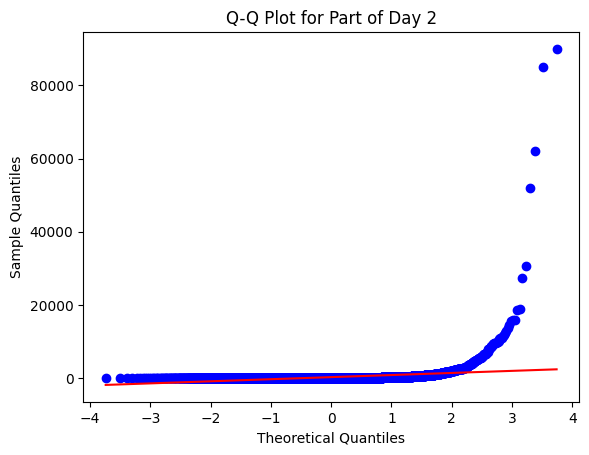

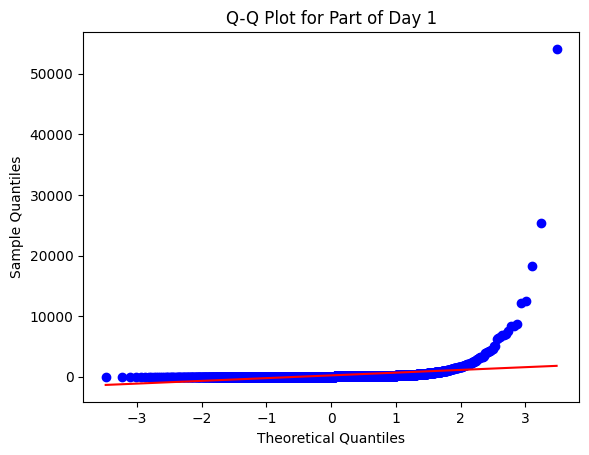

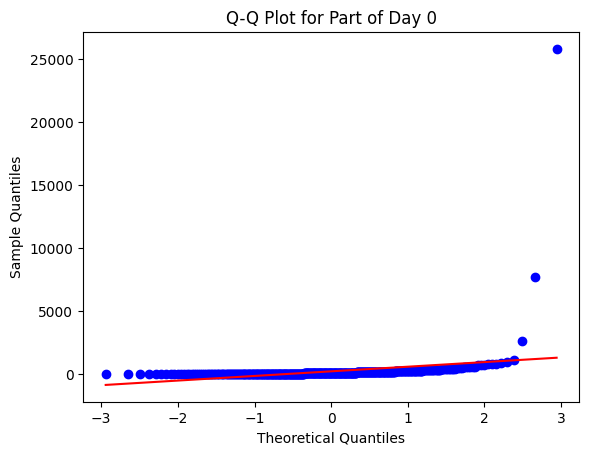

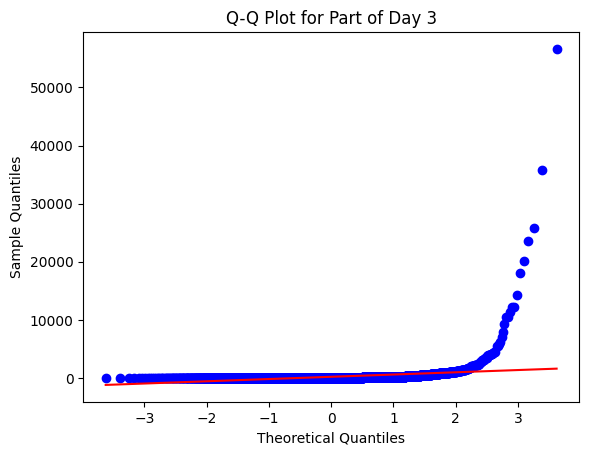

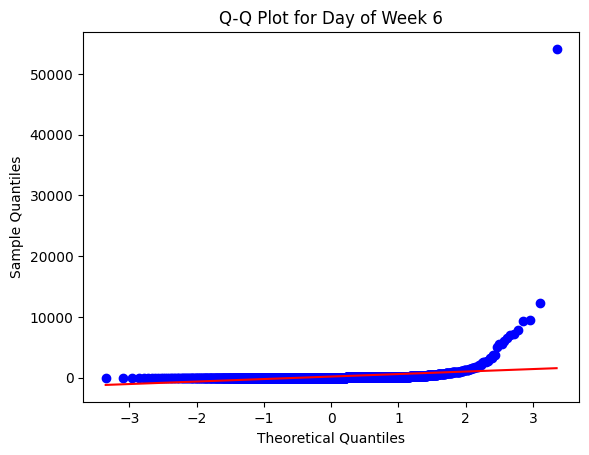

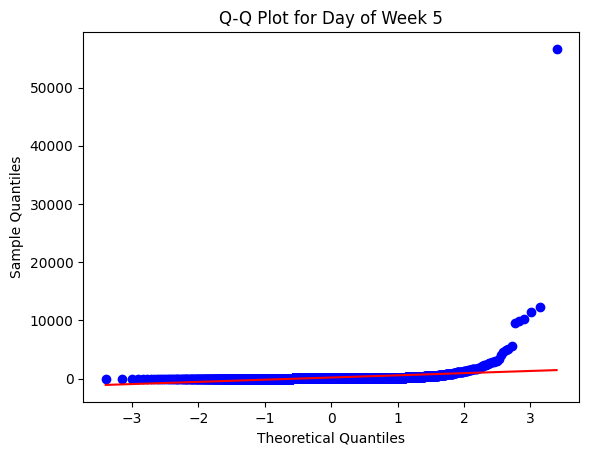

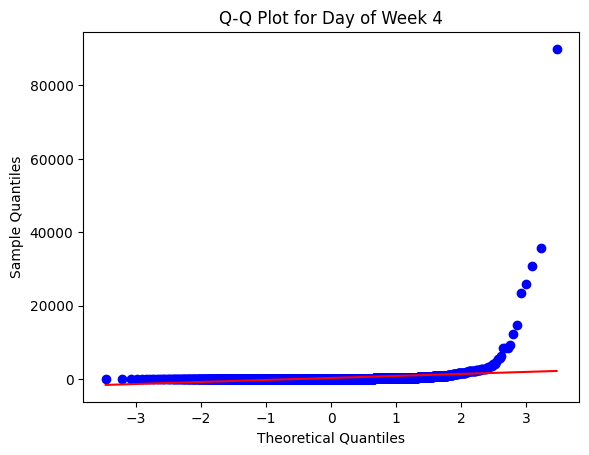

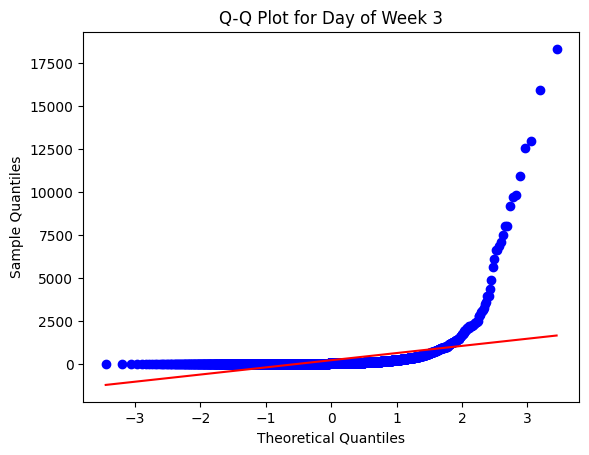

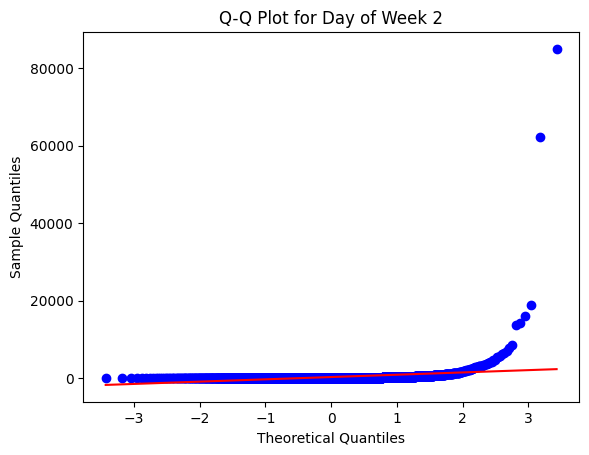

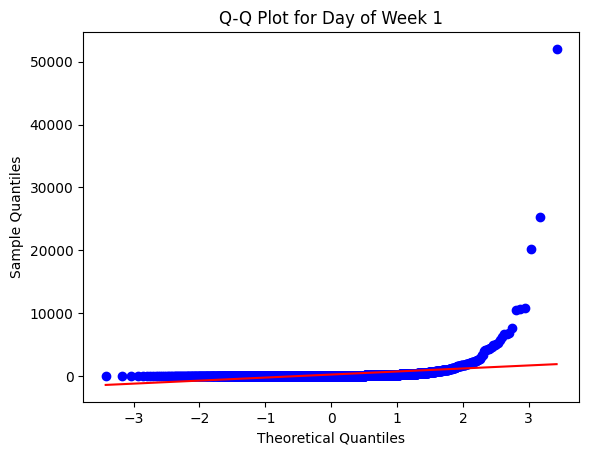

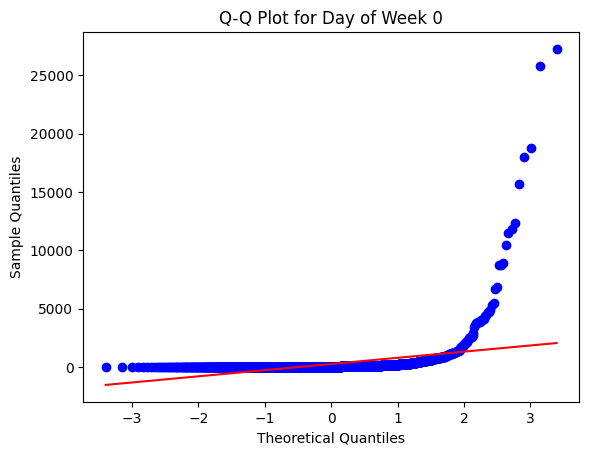

In [51]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Let's assume your 'merged_df' DataFrame is already loaded and has the columns mentioned.
# You may need to replace this line with the code that actually loads your data:
# merged_df = pd.read_csv('path_to_your_data.csv') or other DataFrame loading method

# Function to create and display Q-Q plots
def qq_plot(data, title):
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(title)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.show()

# Q-Q plots for 'Unweighted_Engagement_Score' for each part of the day
for i in merged_df['Part of Day Numeric'].unique():
    scores = merged_df[merged_df['Part of Day Numeric'] == i]['Unweighted_Engagement_Score'].dropna()
    qq_plot(scores, f'Q-Q Plot for Part of Day {i}')

# Q-Q plots for 'Unweighted_Engagement_Score' for each day of the week
for i in merged_df['Day of Week'].unique():
    scores = merged_df[merged_df['Day of Week'] == i]['Unweighted_Engagement_Score'].dropna()
    qq_plot(scores, f'Q-Q Plot for Day of Week {i}')


## Kruskal-Wallis H Test Analysis on Engagement Scores Across Different Parts of the Day

To examine whether there are significant differences in engagement scores across different parts of the day, we conducted a Kruskal-Wallis H test. The data was segmented into four categories based on the part of the day: morning, afternoon, evening, and night. Initially, for the purpose of the Kruskal-Wallis H test, we compared the engagement scores across three parts of the day: morning, afternoon, and evening.

### First Test Results

The Kruskal-Wallis H test yielded the following results:
- **Statistic:** 7.7153
- **p-value:** 0.0211

### Interpretation of First Test

The p-value of 0.0211 indicates that there is a statistically significant difference in engagement scores across the three parts of the day tested (morning, afternoon, and evening) at the 5% significance level. This suggests that the time of day may have an impact on engagement scores.

### Comprehensive Test Including Night

A subsequent Kruskal-Wallis H test was performed to include all four parts of the day, adding the night category into the analysis.

#### Results of Comprehensive Test

The comprehensive Kruskal-Wallis H test provided the following findings:
- **Statistic:** 23.7108
- **p-value:** 0.000590

### Interpretation of Comprehensive Test

The significantly low p-value of 0.000590 suggests a strong statistically significant difference in engagement scores across all four parts of the day: morning, afternoon, evening, and night, at the 5% significance level. This enhanced analysis confirms that the time of day has a significant impact on engagement scores, and the inclusion of the night category further elucidates the extent of this effect.

### Conclusion

Both analyses underline the importance of considering the time of day when assessing engagement scores. The initial test showed a significant difference without the night category, and the comprehensive test with all four parts of the day reinforced this finding, highlighting a pronounced variance in engagement throughout the day.


In [52]:
from scipy.stats import kruskal

# Example: Comparing engagement scores across three parts of the day
scores_morning = merged_df[merged_df['Part of Day Numeric'] == 0]['Unweighted_Engagement_Score'].dropna()
scores_afternoon = merged_df[merged_df['Part of Day Numeric'] == 1]['Unweighted_Engagement_Score'].dropna()
scores_evening = merged_df[merged_df['Part of Day Numeric'] == 2]['Unweighted_Engagement_Score'].dropna()
scores_nights = merged_df[merged_df['Part of Day Numeric'] == 3]['Unweighted_Engagement_Score'].dropna()

stat, p = kruskal(scores_morning, scores_afternoon, scores_evening)
print(f"Kruskal-Wallis H Test: Statistic={stat}, p-value={p}")


Kruskal-Wallis H Test: Statistic=7.715299850514214, p-value=0.02111756911991884


In [53]:
from scipy.stats import kruskal

# Example: Comparing engagement scores across three parts of the day
scores_monday = merged_df[merged_df['Day of Week'] == 0]['Unweighted_Engagement_Score'].dropna()
scores_tuesday = merged_df[merged_df['Day of Week'] == 1]['Unweighted_Engagement_Score'].dropna()
scores_wensday = merged_df[merged_df['Day of Week'] == 2]['Unweighted_Engagement_Score'].dropna()
scores_tursday = merged_df[merged_df['Day of Week'] == 3]['Unweighted_Engagement_Score'].dropna()
scores_friday = merged_df[merged_df['Day of Week'] == 4]['Unweighted_Engagement_Score'].dropna()
scores_saturday = merged_df[merged_df['Day of Week'] == 5]['Unweighted_Engagement_Score'].dropna()
scores_sunday = merged_df[merged_df['Day of Week'] == 6]['Unweighted_Engagement_Score'].dropna()

stat, p = kruskal(scores_monday, scores_tuesday, scores_wensday,scores_tursday, scores_friday, scores_saturday, scores_sunday)
print(f"Kruskal-Wallis H Test: Statistic={stat}, p-value={p}")

Kruskal-Wallis H Test: Statistic=23.7108096263238, p-value=0.0005902345562124145


## Lilliefors Test for Normality Analysis

The Lilliefors test for normality was applied to assess the distribution of unweighted engagement scores across different segments of time, specifically "Part of Day" and "Day of Week". The purpose of these tests is to determine if the engagement scores follow a normal distribution within these temporal segments.

### Lilliefors Test for Normality - Part of Day

Results indicate that the distribution of engagement scores for different parts of the day significantly deviates from normality:

- **Part of Day 0** (Morning):
  - Statistic: 0.4397
  - P-value: <0.001
- **Part of Day 1** (Afternoon):
  - Statistic: 0.4330
  - P-value: <0.001
- **Part of Day 2** (Evening):
  - Statistic: 0.4451
  - P-value: <0.001
- **Part of Day 3** (Night):
  - Statistic: 0.4423
  - P-value: <0.001

These very low P-values across all parts of the day suggest that the engagement scores do not follow a normal distribution.

### Lilliefors Test for Normality - Day of Week

Similarly, the distribution of engagement scores across the days of the week also exhibits significant deviations from normality:

- **Day of Week 0**:
  - Statistic: 0.4212
  - P-value: <0.001
- **Day of Week 1**:
  - Statistic: 0.4338
  - P-value: <0.001
- **Day of Week 2**:
  - Statistic: 0.4527
  - P-value: <0.001
- **Day of Week 3**:
  - Statistic: 0.4025
  - P-value: <0.001
- **Day of Week 4**:
  - Statistic: 0.4537
  - P-value: <0.001
- **Day of Week 5**:
  - Statistic: 0.4478
  - P-value: <0.001
- **Day of Week 6**:
  - Statistic: 0.4456
  - P-value: <0.001

Each day of the week shows a significant deviation from a normal distribution, as indicated by the uniformly low P-values.

This comprehensive analysis highlights the non-normal distribution of engagement scores across both temporal segments, suggesting that different statistical approaches might be necessary to accurately analyze and interpret these data.


In [54]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import lilliefors

# Assuming 'merged_df' is your DataFrame and it's already loaded with data.

# Lilliefors Test for each Part of Day
print("Lilliefors Test for Normality - Part of Day:")
for part_of_day in sorted(merged_df['Part of Day Numeric'].unique()):
    scores = merged_df[merged_df['Part of Day Numeric'] == part_of_day]['Unweighted_Engagement_Score'].dropna()
    if len(scores) > 0:
        stat, p_value = lilliefors(scores)
        print(f"Part of Day {part_of_day}: Statistic={stat}, P-value={p_value}")
    else:
        print(f"No data available for Part of Day: {part_of_day}")

print("\n")

# Lilliefors Test for each Day of Week
print("Lilliefors Test for Normality - Day of Week:")
for day_of_week in sorted(merged_df['Day of Week'].unique()):
    scores = merged_df[merged_df['Day of Week'] == day_of_week]['Unweighted_Engagement_Score'].dropna()
    if len(scores) > 0:
        stat, p_value = lilliefors(scores)
        print(f"Day of Week {day_of_week}: Statistic={stat}, P-value={p_value}")
    else:
        print(f"No data available for Day of Week: {day_of_week}")


Lilliefors Test for Normality - Part of Day:
Part of Day 0: Statistic=0.43966765498877186, P-value=0.0009999999999998899
Part of Day 1: Statistic=0.43300669096521877, P-value=0.0009999999999998899
Part of Day 2: Statistic=0.4450620373558541, P-value=0.0009999999999998899
Part of Day 3: Statistic=0.44233058436191774, P-value=0.0009999999999998899


Lilliefors Test for Normality - Day of Week:
Day of Week 0: Statistic=0.42116030279299016, P-value=0.0009999999999998899
Day of Week 1: Statistic=0.43376454575645745, P-value=0.0009999999999998899
Day of Week 2: Statistic=0.45270217515985434, P-value=0.0009999999999998899
Day of Week 3: Statistic=0.4025478601070575, P-value=0.0009999999999998899
Day of Week 4: Statistic=0.4536902648442549, P-value=0.0009999999999998899
Day of Week 5: Statistic=0.4478002792454303, P-value=0.0009999999999998899
Day of Week 6: Statistic=0.44558012412889525, P-value=0.0009999999999998899


## Mann-Whitney U Test Analysis

The Mann-Whitney U test was utilized to assess the differences in unweighted engagement scores between different temporal segments, both for "Part of Day" and "Day of Week." The goal was to determine if there were statistically significant differences in engagement scores across these segments.

### Mann-Whitney U Test - Part of Day

Here are the results of comparing engagement scores between different parts of the day:

- **Part of Day 0 vs Part of Day 1:**
  - U statistic = 629762.5, p-value = 0.0416, Significant at adjusted alpha (0.0083): No
- **Part of Day 0 vs Part of Day 2:**
  - U statistic = 1643577.0, p-value = 0.2424, Significant at adjusted alpha (0.0083): No
- **Part of Day 0 vs Part of Day 3:**
  - U statistic = 1104479.0, p-value = 0.0004, Significant at adjusted alpha (0.0083): Yes
- **Part of Day 1 vs Part of Day 2:**
  - U statistic = 10176215.0, p-value = 0.0171, Significant at adjusted alpha (0.0083): No
- **Part of Day 1 vs Part of Day 3:**
  - U statistic = 6887312.5, p-value = 0.00196, Significant at adjusted alpha (0.0083): Yes
- **Part of Day 2 vs Part of Day 3:**
  - U statistic = 19113594.5, p-value = 9.697e-14, Significant at adjusted alpha (0.0083): Yes

### Mann-Whitney U Test - Day of Week

Results for comparisons between different days of the week are as follows:

- **Day of Week 0 vs Day of Week 5:**
  - U statistic = 2186514.5, p-value = 0.0016, Significant at adjusted alpha (0.0024): Yes
- **Day of Week 2 vs Day of Week 5:**
  - U statistic = 2479964.5, p-value = 0.00167, Significant at adjusted alpha (0.0024): Yes
- **Day of Week 3 vs Day of Week 5:**
  - U statistic = 2664464.0, p-value = 0.00023, Significant at adjusted alpha (0.0024): Yes
- **Day of Week 3 vs Day of Week 6:**
  - U statistic = 2233757.0, p-value = 0.0021, Significant at adjusted alpha (0.0024): Yes

All other comparisons between days of the week resulted in no significant difference at the adjusted alpha level of 0.0024.

This analysis highlights specific segments of time where engagement scores significantly differ, pointing to potential temporal impacts on engagement behavior.


In [55]:
from scipy.stats import mannwhitneyu

# Part of Day segments
part_of_day_segments = sorted(merged_df['Part of Day Numeric'].unique())

# Number of comparisons
num_comparisons = len(part_of_day_segments) * (len(part_of_day_segments) - 1) / 2
adjusted_alpha = 0.05 / num_comparisons  # Adjust for multiple comparisons, if desired

# Store results
results = []

# Conduct Mann-Whitney U tests for each pair of Part of Day segments
for i, segment1 in enumerate(part_of_day_segments):
    for segment2 in part_of_day_segments[i+1:]:
        scores1 = merged_df[merged_df['Part of Day Numeric'] == segment1]['Unweighted_Engagement_Score'].dropna()
        scores2 = merged_df[merged_df['Part of Day Numeric'] == segment2]['Unweighted_Engagement_Score'].dropna()
        if len(scores1) > 0 and len(scores2) > 0:  # Ensure both groups have data
            stat, p = mannwhitneyu(scores1, scores2)
            significant = 'Yes' if p < adjusted_alpha else 'No'
            results.append((segment1, segment2, stat, p, significant))

# Print results
print("Mann-Whitney U Test between Part of Day Groups:")
for res in results:
    segment1, segment2, stat, p, significant = res
    print(f"Part of Day {segment1} vs Part of Day {segment2}: U statistic = {stat}, p-value = {p}, Significant at adjusted alpha ({adjusted_alpha}): {significant}")


Mann-Whitney U Test between Part of Day Groups:
Part of Day 0 vs Part of Day 1: U statistic = 629762.5, p-value = 0.041636887559952596, Significant at adjusted alpha (0.008333333333333333): No
Part of Day 0 vs Part of Day 2: U statistic = 1643577.0, p-value = 0.24236125826355936, Significant at adjusted alpha (0.008333333333333333): No
Part of Day 0 vs Part of Day 3: U statistic = 1104479.0, p-value = 0.0003927450342749139, Significant at adjusted alpha (0.008333333333333333): Yes
Part of Day 1 vs Part of Day 2: U statistic = 10176215.0, p-value = 0.01711716819336816, Significant at adjusted alpha (0.008333333333333333): No
Part of Day 1 vs Part of Day 3: U statistic = 6887312.5, p-value = 0.0019635804657597063, Significant at adjusted alpha (0.008333333333333333): Yes
Part of Day 2 vs Part of Day 3: U statistic = 19113594.5, p-value = 9.697470106243141e-14, Significant at adjusted alpha (0.008333333333333333): Yes


In [56]:
# Day of Week segments
day_of_week_segments = sorted(merged_df['Day of Week'].unique())

# Number of comparisons
num_comparisons = len(day_of_week_segments) * (len(day_of_week_segments) - 1) / 2
adjusted_alpha = 0.05 / num_comparisons  # Adjust for multiple comparisons, if desired

# Store results
results = []

# Conduct Mann-Whitney U tests for each pair of Day of Week segments
for i, day1 in enumerate(day_of_week_segments):
    for day2 in day_of_week_segments[i+1:]:
        scores1 = merged_df[merged_df['Day of Week'] == day1]['Unweighted_Engagement_Score'].dropna()
        scores2 = merged_df[merged_df['Day of Week'] == day2]['Unweighted_Engagement_Score'].dropna()
        if len(scores1) > 0 and len(scores2) > 0:  # Ensure both groups have data
            stat, p = mannwhitneyu(scores1, scores2)
            significant = 'Yes' if p < adjusted_alpha else 'No'
            results.append((day1, day2, stat, p, significant))

# Print results
print("Mann-Whitney U Test between Day of Week Groups:")
for res in results:
    day1, day2, stat, p, significant = res
    print(f"Day of Week {day1} vs Day of Week {day2}: U statistic = {stat}, p-value = {p}, Significant at adjusted alpha ({adjusted_alpha}): {significant}")


Mann-Whitney U Test between Day of Week Groups:
Day of Week 0 vs Day of Week 1: U statistic = 2291797.0, p-value = 0.7144916948080191, Significant at adjusted alpha (0.002380952380952381): No
Day of Week 0 vs Day of Week 2: U statistic = 2350773.0, p-value = 0.9906115729938598, Significant at adjusted alpha (0.002380952380952381): No
Day of Week 0 vs Day of Week 3: U statistic = 2486511.0, p-value = 0.6717999639511878, Significant at adjusted alpha (0.002380952380952381): No
Day of Week 0 vs Day of Week 4: U statistic = 2758998.0, p-value = 0.12608249308399758, Significant at adjusted alpha (0.002380952380952381): No
Day of Week 0 vs Day of Week 5: U statistic = 2186514.5, p-value = 0.0016394049642148392, Significant at adjusted alpha (0.002380952380952381): Yes
Day of Week 0 vs Day of Week 6: U statistic = 1832838.0, p-value = 0.009589152004320237, Significant at adjusted alpha (0.002380952380952381): No
Day of Week 1 vs Day of Week 2: U statistic = 2570610.5, p-value = 0.708640522282

## Engagement Score Distribution Analysis

An extensive analysis was conducted to explore the distribution of unweighted engagement scores across various times of day for each day of the week. The analysis aimed to uncover potential patterns or behaviors related to engagement throughout different periods.

### Methodology

A series of histograms were generated using the seaborn and matplotlib libraries in Python, which illustrated the frequency distributions of engagement scores. Each histogram represents a unique combination of a part of the day and a day of the week, allowing for a detailed breakdown of the engagement patterns.

### Observations

The histograms indicate variability in engagement scores across different times and days, suggesting specific periods where engagement levels are notably higher or lower. The kernel density estimate overlaid on the histograms provides a smooth estimation of the score distribution, offering insights into the central tendencies and variabilities within each subgroup.

### Histogram Grid

The output consists of a grid of subplots, each titled with the corresponding part of the day and day of the week, such as 'Morning | Monday', 'Afternoon | Tuesday', etc. The X-axis represents the 'Engagement Score', and the Y-axis denotes 'Frequency'.

### Insights

- The engagement scores appear to have varied distributions, with some showing a more skewed pattern while others are more uniform.
- Notable differences can be observed between different days of the week, as well as various times of the day.
- The peak times for engagement could be indicative of user behavior and preferences, which may be valuable for targeted content delivery or advertisement scheduling.

### Further Analysis

To deepen the understanding of these distributions, additional statistical tests for normality and comparative analysis can be implemented. This will help in determining whether the observed differences are statistically significant and in identifying any underlying factors influencing engagement scores.

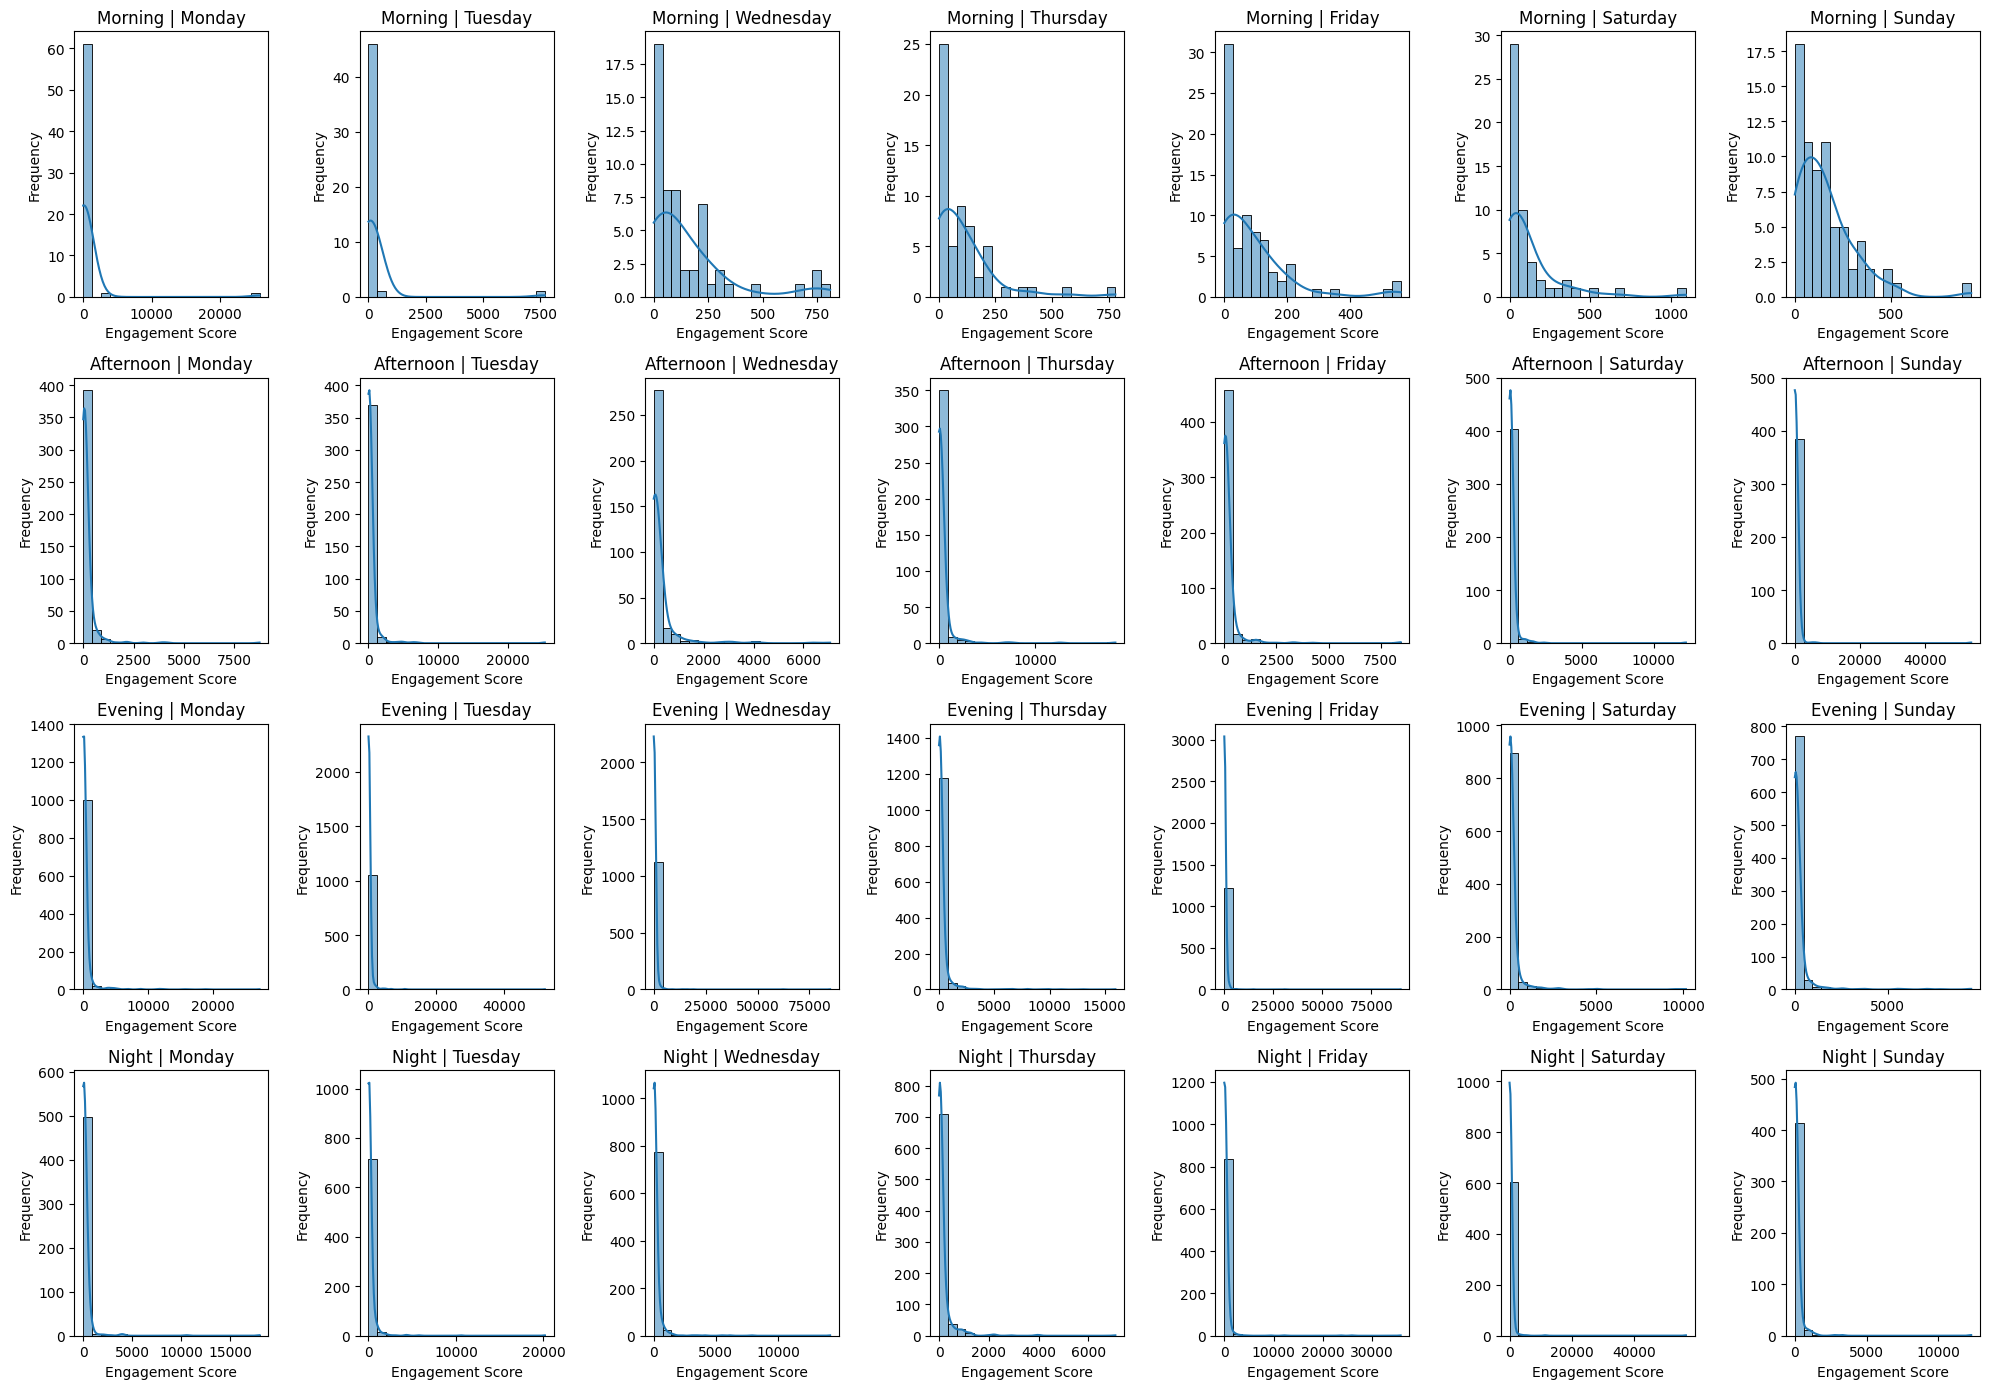

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_df' is your DataFrame and it has the columns 'Part of Day Numeric', 'Day of Week', and 'Unweighted_Engagement_Score'

# Set up the matplotlib figure (adjust figsize as needed)
plt.figure(figsize=(20, 14))  # Adjust this size based on your actual data

# Define the number of rows and columns for subplot grid
n_rows = len(merged_df['Part of Day Numeric'].unique())
n_cols = len(merged_df['Day of Week'].unique())
count = 1

for part_of_day in sorted(merged_df['Part of Day Numeric'].unique()):
    for day_of_week in sorted(merged_df['Day of Week'].unique()):
        plt.subplot(n_rows, n_cols, count)
        count += 1
        subgroup = merged_df[(merged_df['Part of Day Numeric'] == part_of_day) & (merged_df['Day of Week'] == day_of_week)]
        sns.histplot(subgroup['Unweighted_Engagement_Score'], kde=True, bins=20)
        
        # Customizing the title to show Part of Day and Day of Week
        part_of_day_str = ['Morning', 'Afternoon', 'Evening', 'Night'][part_of_day]  # Adjust based on your coding
        day_of_week_str = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'][day_of_week]  # Adjust if necessary
        
        plt.title(f'{part_of_day_str} | {day_of_week_str}')
        plt.xlabel('Engagement Score')
        plt.ylabel('Frequency')

# Adjust layout to prevent overlap between plots
plt.tight_layout()
plt.show()


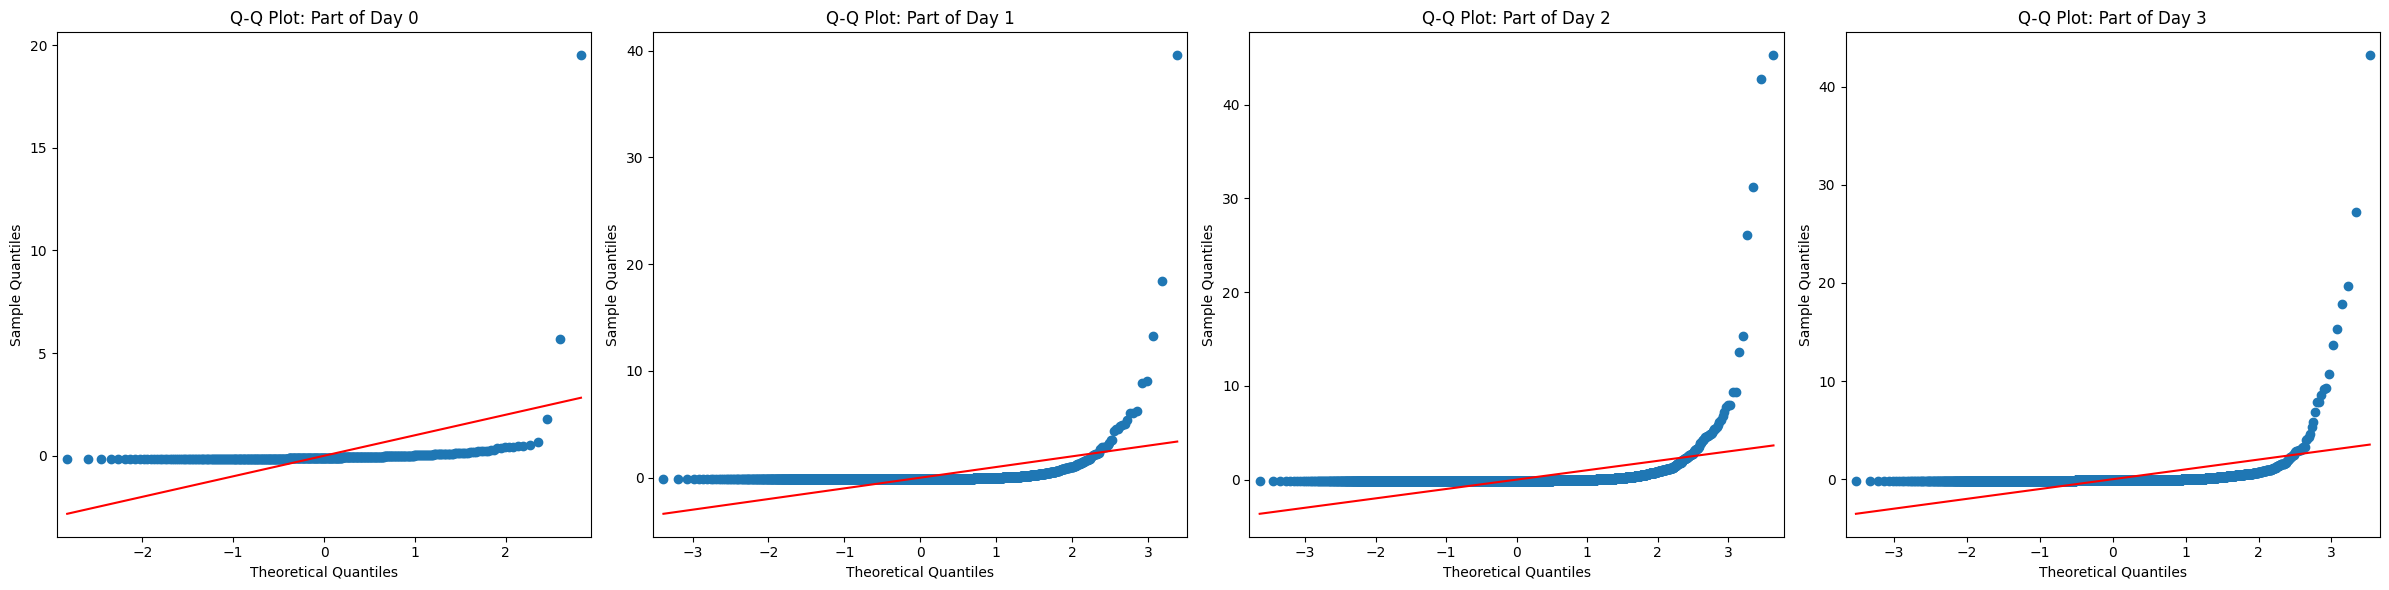

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

# Assuming 'merged_df' is your DataFrame and it's already loaded with data.

# Part of Day segments
part_of_day_segments = merged_df['Part of Day Numeric'].unique()

# Set up the matplotlib figure
plt.figure(figsize=(24, 6))  # Adjust the figure size as needed

# Create a subplot for each 'Part of Day' segment
for i, part_of_day in enumerate(sorted(part_of_day_segments), 1):  # Start enumeration at 1 for subplot indexing
    subgroup_scores = merged_df[merged_df['Part of Day Numeric'] == part_of_day]['Unweighted_Engagement_Score'].dropna()
    if len(subgroup_scores) > 0:  # Check if the subgroup contains data
        plt.subplot(1, len(part_of_day_segments), i)  # 1 row, N columns, ith subplot
        sm.qqplot(subgroup_scores, line='s', fit=True, ax=plt.gca())  # 'gca' gets the current axis
        plt.title(f'Q-Q Plot: Part of Day {part_of_day}')
    else:
        print(f"No data available for Part of Day: {part_of_day}")

# Adjust layout to prevent overlap and ensure all titles and axes are visible
plt.tight_layout()
plt.show()


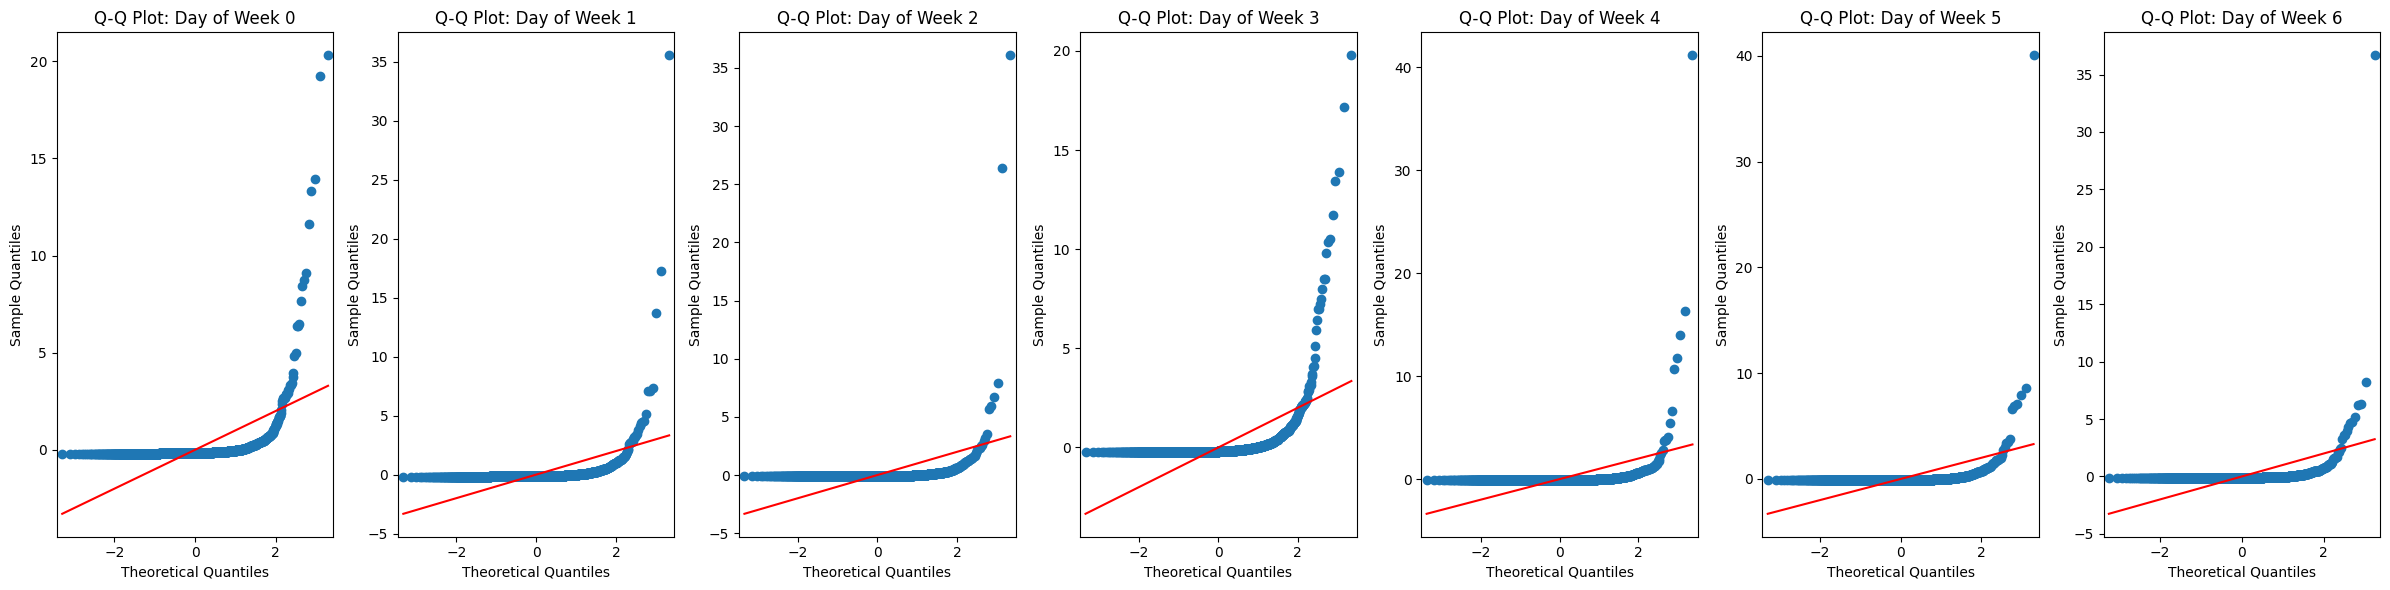

RRuntimeError: Error in eval(predvars, data, env) : object 'Day_of_Week' not found


In [60]:
# Day of Week segments
day_of_week_segments = merged_df['Day of Week'].unique()

# Set up the matplotlib figure
plt.figure(figsize=(24, 6))  # Adjust the figure size as needed

# Create a subplot for each 'Day of Week' segment
for i, day_of_week in enumerate(sorted(day_of_week_segments), 1):  # Sort and start enumeration at 1 for subplot indexing
    subgroup_scores = merged_df[merged_df['Day of Week'] == day_of_week]['Unweighted_Engagement_Score'].dropna()
    if len(subgroup_scores) > 0:  # Check if the subgroup contains data
        plt.subplot(1, len(day_of_week_segments), i)  # 1 row, N columns, ith subplot
        sm.qqplot(subgroup_scores, line='s', fit=True, ax=plt.gca())  # 'gca' gets the current axis
        plt.title(f'Q-Q Plot: Day of Week {day_of_week}')
    else:
        print(f"No data available for Day of Week: {day_of_week}")

# Adjust layout to prevent overlap and ensure all titles and axes are visible
plt.tight_layout()
plt.show()
from pymer4.models import Lmer
from pymer4.utils import get_resource_path

# Assuming your dataframe is named `data` and includes all the required variables
data = merged_df  # Replace `your_dataframe_name` with the actual name of your dataframe

# Define the model
# Include 'Date' as a fixed effect if you have reasons to believe specific dates have unique effects. Otherwise, consider removing it or replacing it with another variable like 'Day of Week'.
# 'Part of Day' and 'Day of Week' are categorical variables, so we use C() to indicate this.
# 'number_of_followers' is assumed to be a continuous variable
# '(1 | Profile)' is a random effect indicating that we expect variation in intercepts across different 'Profile's
# Adjust the model formula as needed based on your data's specifics and your hypothesis about the influences on 'Unweighted_Engagement_Score'.
model = Lmer("Unweighted_Engagement_Score ~ C(Day_of_Week) + C(Part_of_Day) + Part_of_Day_Numeric + number_of_followers + (1 | Profile)", data=data)

# Fit the model
model.fit()


### Sub_Question 3:

In [ ]:
#
# Expanded lists of keywords for Events and Offers
events_keywords = [
    "show", "concert", "parade", "fireworks", "festival", "night", "celebration",
    "performance", "meet and greet", "magic show", "dinner show", "theme night",
    "character breakfast", "Halloween", "Christmas", "Easter", "summer nights",
    "live entertainment", "seasonal event", "autumn fest", "winter wonderland",
    "spring break", "character parade", "music festival", "carnival", "horror night",
    "family fun day", "superhero weekend", "princess day", "pyrotechnics", "theater show",
    "animal encounter", "educational tour", "VIP event", "special performance",
    "anniversary event", "new year's eve", "special celebration", "exclusive event",
    "fan meet-up"
]

offers_keywords = [
    "discount", "sale", "offer", "deal", "promotion", "early bird", "season pass",
    "family pack", "group rate", "flash sale", "special admission", "free entry",
    "buy one get one", "limited time offer", "exclusive access", "online booking discount",
    "ticket special", "membership discount", "upgrade promotion", "multi-day pass",
    "annual pass", "online discount", "kids go free", "holiday special", "weekend sale",
    "gift card offer", "last-minute deal", "early booking bonus", "companion discount",
    "birthday offer", "return visitor discount", "meal deal", "souvenir discount",
    "photo package deal", "stay and play", "hotel package", "resort special",
    "VIP package", "express pass deal"
]

# Function to check if any of the keywords appear in the text
def classify_text(text, keywords):
    if pd.isnull(text):  # Check if the text is NaN
        return 0
    text = text.lower()  # Convert text to lower case for comparison
    for keyword in keywords:
        if keyword in text:
            return 1
    return 0

# Apply the classification function to the dataset
merged_df['Event'] = merged_df['Message'].apply(lambda x: classify_text(x, events_keywords))
merged_df['Discount'] = merged_df['Message'].apply(lambda x: classify_text(x, offers_keywords))

# Display the first few rows of the updated dataframe
merged_df.head()

,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,...,Unweighted_Engagement_Score,text_length,hashtag_count,readability_score,emoji_count,Day of Week,Part of Day,Part of Day Numeric,Event,Discount
0,2023-12-31 21:40:00,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,0.0,2.0,2.0,2.0,2.0,"1,09E+12",...,8.250000,337,0,74.69,7,6,Evening,2,1,1
1,2023-12-31 20:01:00,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,0.0,1.0,2.0,1.0,1.0,"4,17E+11",...,18.500000,141,4,87.72,3,6,Evening,2,1,0
2,2023-12-31 19:30:00,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,0.0,2.0,3.0,2.0,2.0,"2,85E+11",...,12.250000,128,8,38.99,1,6,Evening,2,1,0
3,2023-12-31 19:00:00,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,0.0,52.0,12.0,56.0,56.0,"1,36E+11",...,297.000000,45,0,48.47,3,6,Evening,2,0,0
4,2023-12-31 19:00:00,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,0.0,2.0,0.0,2.0,2.0,"4,96E+11",...,11.666667,227,0,83.36,0,6,Evening,2,0,1


### Sub_Question 4:

In [ ]:
#

In [ ]:
# Compute pairwise correlation of columns, excluding NA/null values
numeric_merged_df = merged_df.select_dtypes(include=[np.number])
print(numeric_merged_df.corr())

                              Number of Reactions  Number of Shares  \
Number of Reactions                      1.000000               NaN   
Number of Shares                              NaN               NaN   
Number of Comments (primary)             0.528398               NaN   
Number of Shares.1                       0.845981               NaN   
Comments per post                        0.498470               NaN   
Comments on posts by fans                0.498470               NaN   
Number of Likes                          0.963353               NaN   
Link-posts                                    NaN               NaN   
Picture Posts                                 NaN               NaN   
Video-posts                                   NaN               NaN   
total_shares                             0.845981               NaN   
Unweighted_Engagement_Score              0.995097               NaN   
text_length                             -0.054856               NaN   
hashta

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')

# Function to clean text
def clean_text(text):
    # Tokenize text and remove punctuation
    tokens = word_tokenize(text)
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # Remove non-alphabetic tokens and stopwords
    words = [word.lower() for word in stripped if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return words

# Apply cleaning function to each comment
merged_df['cleaned_Message'] = merged_df['Message'].apply(clean_text)

merged_df

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/owenalberts/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/owenalberts/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,...,text_length,hashtag_count,readability_score,emoji_count,Day of Week,Part of Day,Part of Day Numeric,Event,Discount,cleaned_Message
0,2023-12-31 21:40:00,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,0.0,2.0,2.0,2.0,2.0,"1,09E+12",...,337,0,74.69,7,6,Evening,2,1,1,"[today, final, day, use, season, passes, nt, m..."
1,2023-12-31 20:01:00,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,0.0,1.0,2.0,1.0,1.0,"4,17E+11",...,141,4,87.72,3,6,Evening,2,1,0,"[see, next, year, miss, huge, firework, displa..."
2,2023-12-31 19:30:00,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,0.0,2.0,3.0,2.0,2.0,"2,85E+11",...,128,8,38.99,1,6,Evening,2,1,0,"[nt, miss, huge, firework, display, fireworks,..."
3,2023-12-31 19:00:00,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,0.0,52.0,12.0,56.0,56.0,"1,36E+11",...,45,0,48.47,3,6,Evening,2,0,0,"[fijne, jaarwisseling, en, tot, volgend, jaar]"
4,2023-12-31 19:00:00,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,0.0,2.0,0.0,2.0,2.0,"4,96E+11",...,227,0,83.36,0,6,Evening,2,0,1,"[last, day, new, year, sale, save, tickets, ma..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15438,2023-01-01 02:00:00,Wild Adventures Theme Park,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,20.0,0.0,1.0,0.0,2.0,2.0,"1,25E+11",...,190,0,85.99,0,6,Night,3,0,1,"[last, chance, prices, season, passes, go, nt,..."
15439,2023-01-01 01:20:00,Playland,O Grupo Playcenter e os Parques Playcenter Fam...,7.0,0.0,1.0,0.0,1.0,1.0,"2,46E+09",...,459,13,17.00,4,6,Night,3,0,0,"[grupo, playcenter, e, os, parques, playcenter..."
15440,2023-01-01 00:01:00,Disneyland Paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833.0,0.0,40.0,31.0,44.0,44.0,"1,75E+12",...,69,0,94.15,2,6,Night,3,0,0,"[gelukkig, laat, de, magie, dit, jaar, stralen..."
15441,2023-01-01 00:00:00,Six Flags Over Georgia & Hurricane Harbor,What are your 2023 New Years resolutions? ✨\n\...,58.0,0.0,7.0,2.0,9.0,9.0,"1,42E+12",...,158,3,64.67,2,6,Night,3,0,0,"[new, years, resolutions, shoutout, jenni, ive..."


In [ ]:
from nltk.probability import FreqDist

# Concatenate all cleaned comments into a single list
all_words = sum(merged_df['cleaned_Message'], [])

# Calculate frequency distribution
freq_dist = FreqDist(all_words)

# Display the most common words
print(freq_dist.most_common(10))


[('https', 4440), ('day', 2986), ('park', 2797), ('get', 2531), ('fun', 2336), ('season', 2258), ('tickets', 2008), ('us', 1994), ('pass', 1864), ('e', 1839)]


In [ ]:
from textblob import TextBlob

# Function to calculate sentiment
def calculate_sentiment(text):
    return TextBlob(' '.join(text)).sentiment.polarity

# Apply the function to cleaned comments
merged_df['Sentiment'] = merged_df['cleaned_Message'].apply(calculate_sentiment)

merged_df.head()


,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,...,hashtag_count,readability_score,emoji_count,Day of Week,Part of Day,Part of Day Numeric,Event,Discount,cleaned_Message,Sentiment
0,2023-12-31 21:40:00,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,0.0,2.0,2.0,2.0,2.0,"1,09E+12",...,0,74.69,7,6,Evening,2,1,1,"[today, final, day, use, season, passes, nt, m...",0.307143
1,2023-12-31 20:01:00,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,0.0,1.0,2.0,1.0,1.0,"4,17E+11",...,4,87.72,3,6,Evening,2,1,0,"[see, next, year, miss, huge, firework, displa...",0.200000
2,2023-12-31 19:30:00,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,0.0,2.0,3.0,2.0,2.0,"2,85E+11",...,8,38.99,1,6,Evening,2,1,0,"[nt, miss, huge, firework, display, fireworks,...",0.400000
3,2023-12-31 19:00:00,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,0.0,52.0,12.0,56.0,56.0,"1,36E+11",...,0,48.47,3,6,Evening,2,0,0,"[fijne, jaarwisseling, en, tot, volgend, jaar]",0.000000
4,2023-12-31 19:00:00,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,0.0,2.0,0.0,2.0,2.0,"4,96E+11",...,0,83.36,0,6,Evening,2,0,1,"[last, day, new, year, sale, save, tickets, ma...",0.109091


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Join words back to form the string of comments
merged_df['Cleaned_Comment_Joined'] = merged_df['cleaned_Message'].apply(lambda x: ' '.join(x))

# Create a document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(merged_df['Cleaned_Comment_Joined'])

# LDA model
LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(dtm)

# Display topics
for index, topic in enumerate(LDA.components_):
    print(f'TOPIC #{index}')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')


TOPIC #0
['year', 'join', 'day', 'today', 'new', 'park', 'santa', 'holiday', 'christmas', 'https']


TOPIC #1
['weekend', 'park', 'summer', 'free', 'tickets', 'fun', 'pass', 'day', 'season', 'https']


TOPIC #2
['weekend', 'weather', 'happy', 'visit', 'open', 'ride', 'new', 'today', 'day', 'park']


TOPIC #3
['parque', 'um', 'em', 'você', 'que', 'play', 'com', 'diversao', 'para', 'playland']


TOPIC #4
['rescue', 'https', 'animal', 'sea', 'theaters', 'wish', 'world', 'animals', 'happy', 'disney']




In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import re

# Utility function definitions remain the same

def clean_post(text):
    """
    Utility function to clean post text by removing links, special characters
    using simple regex statements.
    """
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())

def get_post_sentiment(post):
    """
    Utility function to classify sentiment of passed post
    using textblob's sentiment method
    """
    analysis = TextBlob(clean_post(post))
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text, re.I)
    if match:
        return True
    return False

# Assuming 'merged_df' is already loaded with Facebook data

# Add a column for sentiment analysis
merged_df['sentiment'] = merged_df['Message'].apply(lambda post: get_post_sentiment(post))

# Assuming parks are identified in the 'Profile' column now
# The previous step of determining the park from 'Message' is no longer needed
# Therefore, we remove the loop that applies word_in_text for each park

# Update to count posts by park using 'Profile' directly
tweets_by_park = {park: merged_df[merged_df['Profile'].str.contains(park, case=False)].shape[0] for park in parks}

# Sentiment analysis by park, using 'Profile' for park identification
sent_by_park = merged_df.groupby(['Profile', 'sentiment']).size().groupby(level=0).transform(lambda x: x/x.sum()).unstack()
sent_by_park.plot(kind='barh', figsize=(10, 6))  # Change to 'barh' for horizontal bars
plt.title('Post Sentiment Proportions by Park')
plt.xlabel('Proportion')  # Adjusted for horizontal orientation
plt.ylabel('Park')  # Adjusted for horizontal orientation
plt.show()



NameError: name 'parks' is not defined

/var/folders/r7/wflk5s9j1jx0y8082yq0zqs40000gn/T/ipykernel_70661/3986793807.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df['Sentiment'])


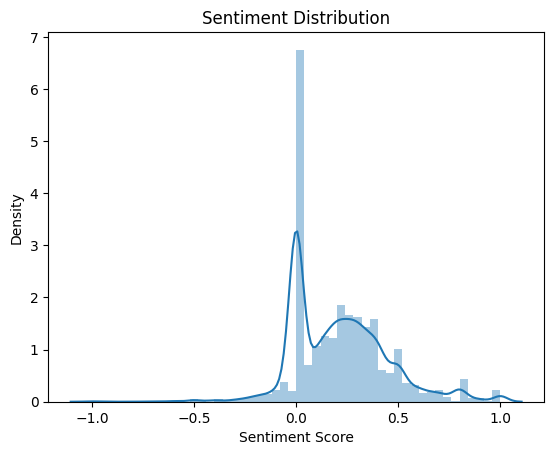

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# For example, plotting the distribution of sentiment
sns.distplot(merged_df['Sentiment'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()


In [ ]:
output_file_path = '/Users/owenalberts/Downloads/dataframes.xlsx'  # Replace with the desired file path

# Save the DataFrame to an Excel file
merged_df.to_excel(output_file_path, index=False, engine='openpyxl')  # Set index=False to avoid writing row indices to the file

print(f"File saved successfully to {output_file_path}")
